# ***prodigy_DS_03***



***Yashika Tirkey***

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [520]:
data = pd.read_csv('bank-additional-full.csv',sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes



   # bank client data:
       1 - age (numeric)
       2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
       3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
       4 - education (categorical: "unknown","secondary","primary","tertiary")
       5 - default: has credit in default? (binary: "yes","no")
       6 - balance: average yearly balance, in euros (numeric) 
       7 - housing: has housing loan? (binary: "yes","no")
       8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
       9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
      10 - day: last contact day of the month (numeric)
      11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
      12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
      13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
      14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
      15 - previous: number of contacts performed before this campaign and for this client (numeric)
      16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

       #Output variable (desired target):
          17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [521]:
data.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

# Data Cleaning

In [522]:
 data.shape

(41188, 21)

In [523]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [525]:
data.duplicated().sum()

12

In [526]:
data.drop_duplicates(inplace=True)

In [527]:
data.shape

(41176, 21)

In [528]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


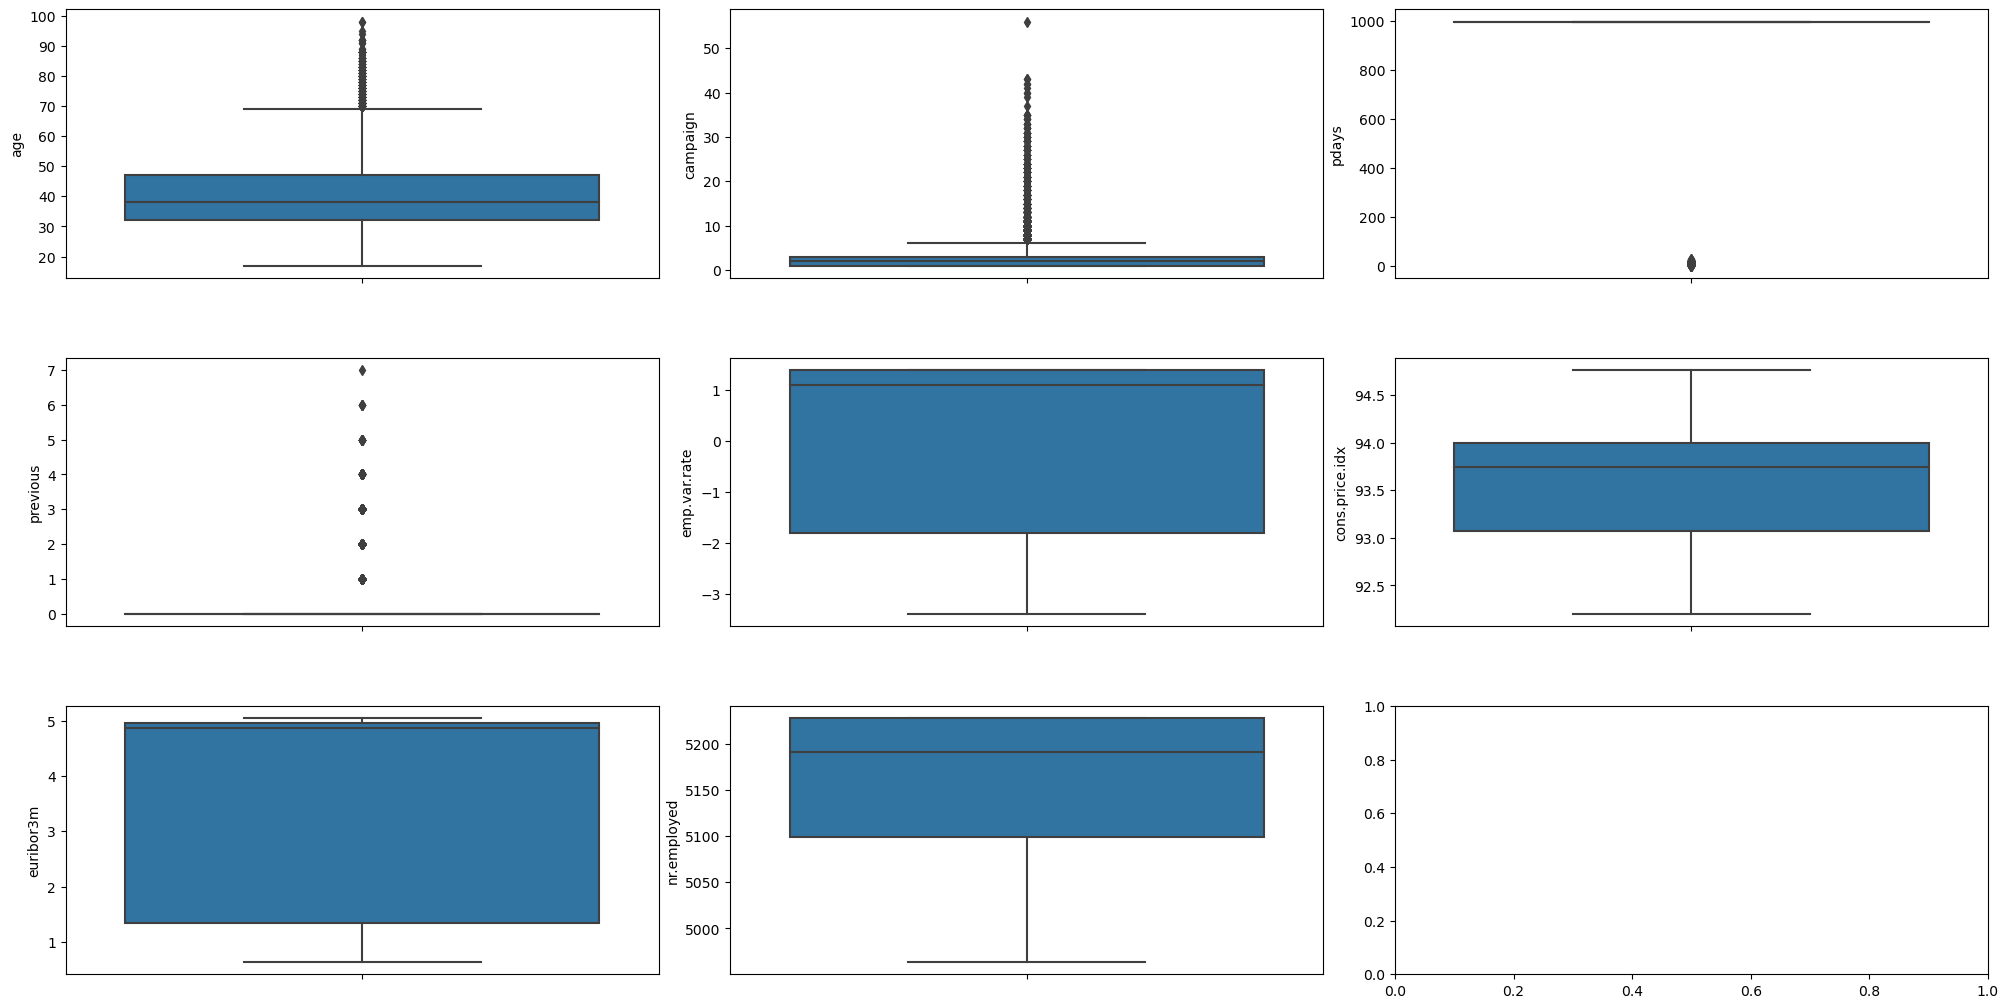

In [529]:
columns = data[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed']]
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in columns.items():
    sns.boxplot(y=k, data=columns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [530]:
def age_groups(x):
    if x <= 20:
        return '0-20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    elif x <= 80:
        return '80 above'
        

In [531]:
data['age_groups'] = data['age'].apply(age_gropus)

In [532]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_groups'],
      dtype='object')

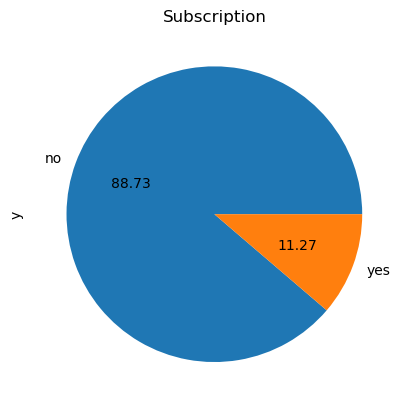

In [533]:
data['y'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Subscription')
plt.show()

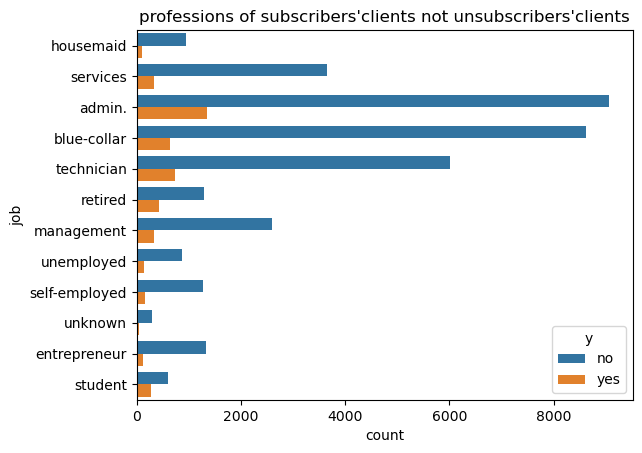

In [534]:
sns.countplot(y=data['job'], hue=data['y'])
plt.title("professions of subscribers'clients not unsubscribers'clients")
plt.show()

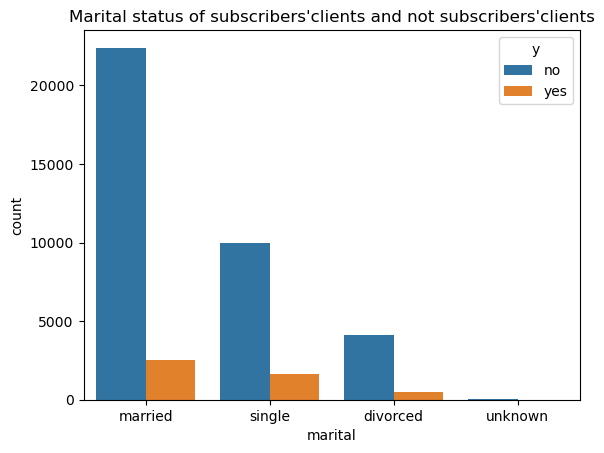

In [535]:
sns.countplot(x=data['marital'], hue=data['y'])
plt.title("Marital status of subscribers'clients and not subscribers'clients")
plt.show()

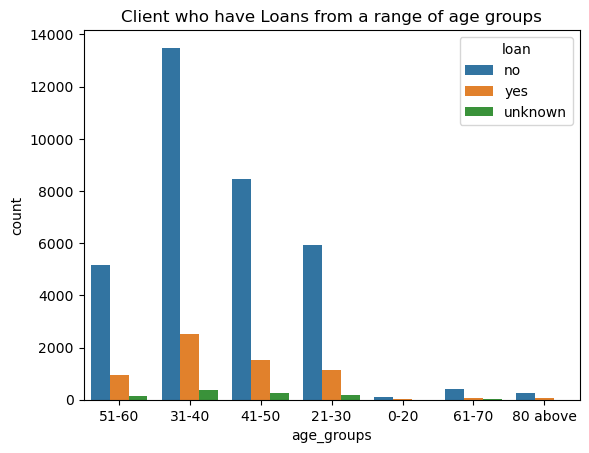

In [536]:
sns.countplot(x=data['age_groups'], hue=data['loan'])
plt.title("Client who have Loans from a range of age groups")
plt.show()

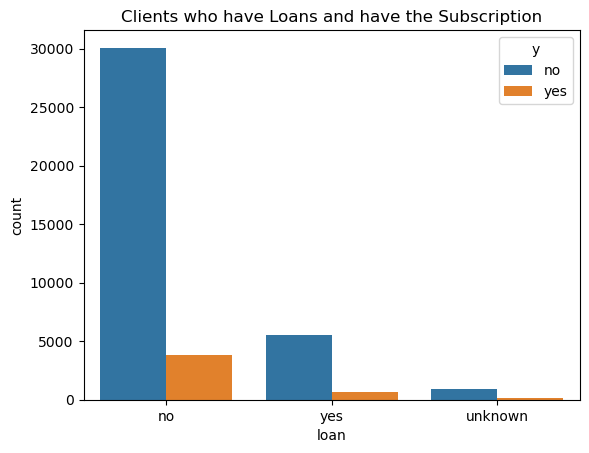

In [537]:
sns.countplot(x=data['loan'], hue=data['y'])
plt.title("Clients who have Loans and have the Subscription")
plt.show()

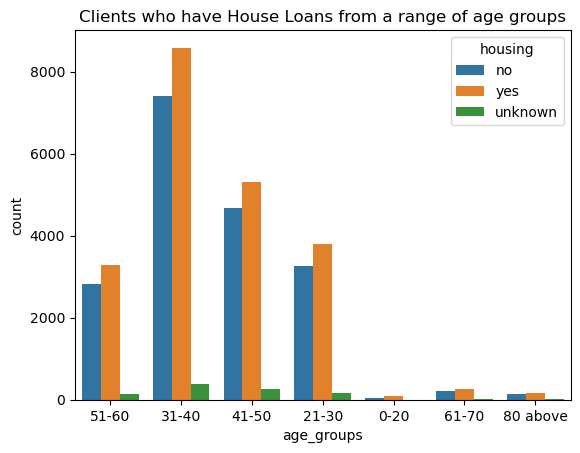

In [538]:
sns.countplot(x=data['age_groups'], hue=data['housing'])
plt.title("Clients who have House Loans from a range of age groups")
plt.show()

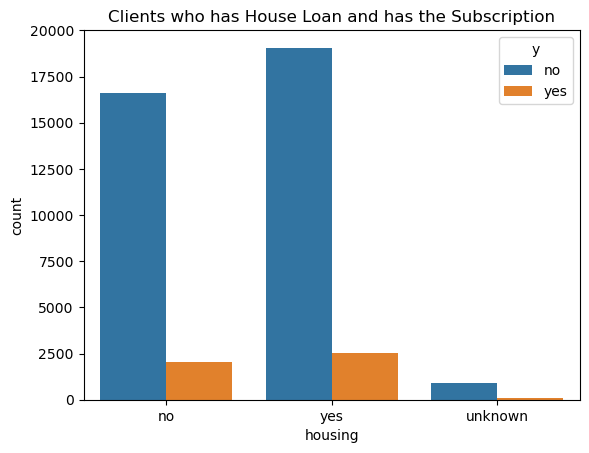

In [539]:
sns.countplot(x=data['housing'], hue=data['y'])
plt.title("Clients who has House Loan and has the Subscription")
plt.show()

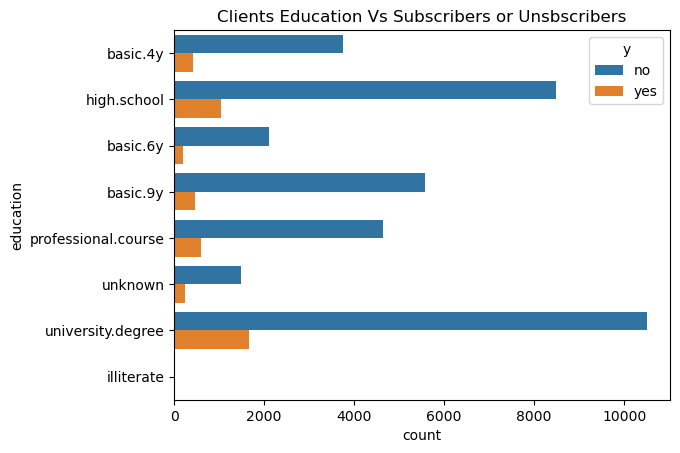

In [540]:
sns.countplot(y=data['education'], hue=data['y'])
plt.title("Clients Education Vs Subscribers or Unsbscribers")
plt.show()

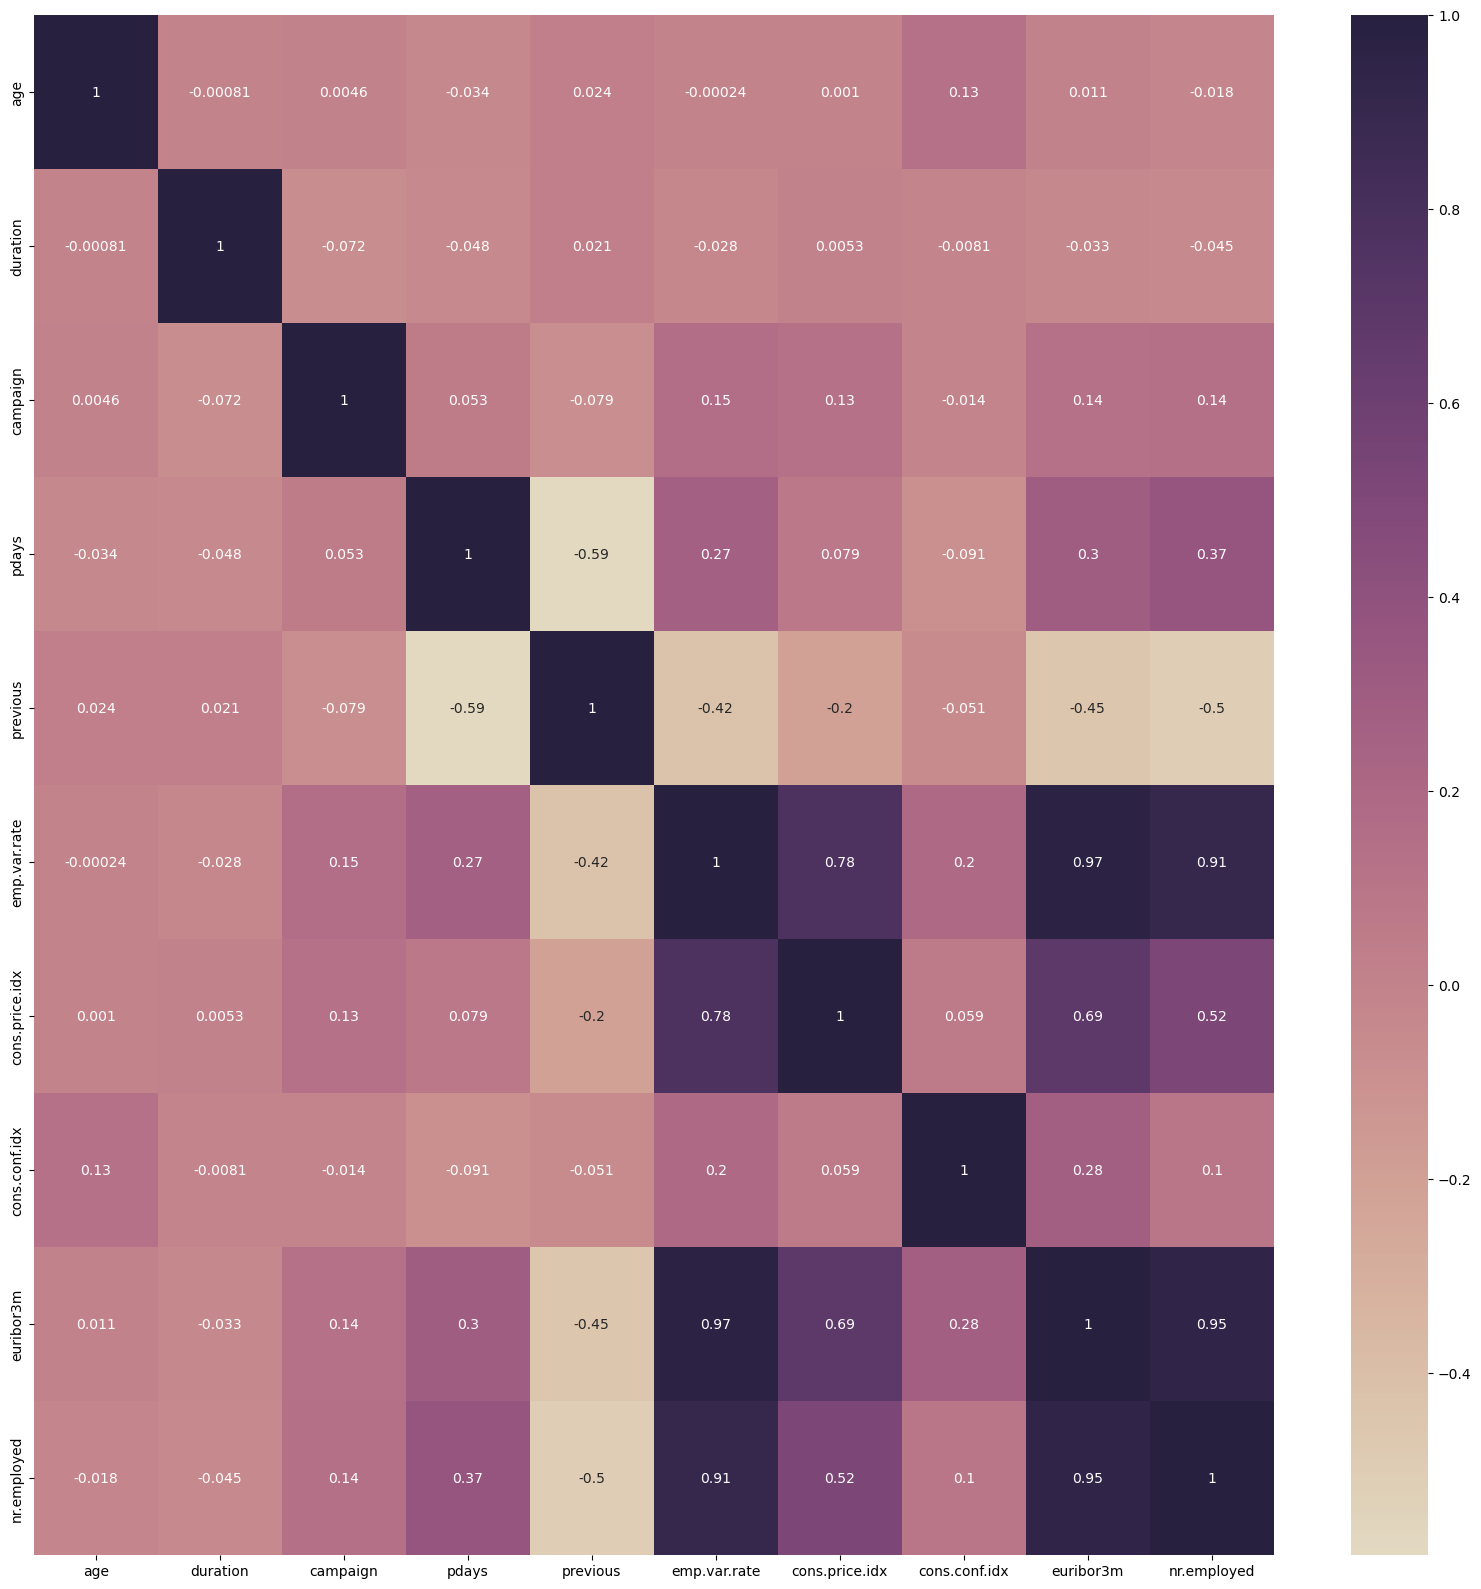

In [541]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [542]:

def correlation(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data, 0.75)
len(set(corr_features)) 

3

In [543]:
corr_features

{'cons.price.idx', 'euribor3m', 'nr.employed'}

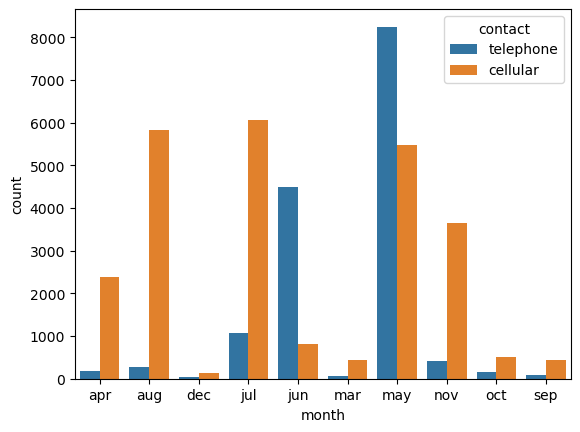

In [578]:
sns.countplot(x=data['month'], hue=data['contact'])
plt.show()

In [544]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'age_groups'],
      dtype='object')

In [545]:
data = data[data['age'] < 70 ]

In [546]:
data.shape

(40708, 22)

In [548]:
data['education'] = data['education'].apply(lambda x: 'other' if x == 'unknown' else x)

In [463]:
data['job'] = data['job'].apply(lambda x: 'other' if x == 'unknown' else x)

In [547]:
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')

In [549]:
x = data[['age','job','marital','education','default','housing','loan','month','day_of_week','duration','poutcome']]

In [550]:
y = data['y']

In [551]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [493]:
x_train.shape

(32566, 11)

In [494]:
x_test.shape

(8142, 11)

In [568]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3)


In [569]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
ohe=OneHotEncoder()
ohe.fit(x[['job','marital','education','default','housing','loan','month','day_of_week','poutcome']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['job','marital','education','default','housing','loan','month','day_of_week','poutcome']),remainder='passthrough')
pipe=make_pipeline(column_trans,dtc) 
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object),
                                                                            array(['divorced', 'married', 'single', 'unknown'...
                                                                            array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'], dtype=object),
                                                                            array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
                                                                            array(['failure', 'nonexistent', 'success'], dtype=object)]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'month',
                                                   'day_of_week',
                                                   'poutcome'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

In [571]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(x_test)

In [572]:
print("Accuracy Score : ", accuracy_score(y_pred,y_test))

Accuracy Score :  0.9115696389093588


In [558]:
y_predict=pipe.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_predict,y_test))

Accuracy Score :  0.9115696389093588


In [576]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7277
         yes       0.64      0.38      0.48       865

    accuracy                           0.91      8142
   macro avg       0.79      0.68      0.71      8142
weighted avg       0.90      0.91      0.90      8142



In [579]:
prediction=pipe.predict(pd.DataFrame([[28,'admin.','single','university.degree','no','no','yes','','mon','121','success']], columns=['age','job','marital','education','default','housing','loan','month','day_of_week','duration','poutcome']))

prediction

array(['no'], dtype=object)

In [ ]:
dtc.fit(x_train,y_train)

In [574]:
output = pd.DataFrame({'Actual': y_test, 'Predicted':y_predict })
output.head(20)

,Actual,Predicted
33644,no,no
34808,no,no
19353,no,no
25109,no,no
7605,no,no
24836,no,no
25298,no,no
38915,no,yes
30860,no,no
33565,no,no


In [199]:
data['']